# Parkinson disease predicition with Modified Grey Wolf Optimization (MGWO) using Voice pd dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import math
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

Load the respective Parkinson dataset

In [2]:
cols=['Subject id','Jitter (local)','Jitter (local, absolute)','Jitter (rap)','Jitter (ppq5)','Jitter (ddp)','Shimmer (local)',
 'Shimmer (local, dB)','Shimmer (apq3)','Shimmer (apq5)','Shimmer (apq11)','Shimmer (dda)','AC','NTH','HTN','Median pitch',
'Mean pitch','Standard deviation','Minimum pitch','Maximum pitch','Number of pulses','Number of periods','Mean period',
'Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks','Degree of voice breaks','UPDRS',
'class information']

my_data=pd.read_table('Parkinson_Multiple_Sound_Recording/train_data.txt',sep=",",header=None,names=cols)
my_data.head()

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [3]:
my_data.drop(columns=["Subject id","UPDRS"],inplace=True)
X_train = my_data.iloc[0:my_data.shape[0],0:my_data.shape[1]-1].values
y_train = my_data.iloc[0:my_data.shape[0],my_data.shape[1]-1:my_data.shape[1]].values
dim=X_train.shape[1]


In [4]:
cols=['Subject id','Jitter (local)','Jitter (local, absolute)','Jitter (rap)','Jitter (ppq5)','Jitter (ddp)','Shimmer (local)',
 'Shimmer (local, dB)','Shimmer (apq3)','Shimmer (apq5)','Shimmer (apq11)','Shimmer (dda)','AC','NTH','HTN','Median pitch',
'Mean pitch','Standard deviation','Minimum pitch','Maximum pitch','Number of pulses','Number of periods','Mean period',
'Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks','Degree of voice breaks',
'class information']
my_data_test=pd.read_table('Parkinson_Multiple_Sound_Recording/test_data.txt',sep=",",header=None,names=cols)
my_data_test.head()

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class information
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1


In [5]:
my_data_test.drop(columns=["Subject id"],inplace=True)
X_test = my_data_test.iloc[0:my_data_test.shape[0],0:my_data_test.shape[1]-1].values
y_test = my_data_test.iloc[0:my_data_test.shape[0],my_data_test.shape[1]-1:my_data_test.shape[1]].values

Feature scaling is a method used to normalize the range of features of data

In [6]:
# Feature Scaling
def featureScaling(X_train,X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train,X_test
    
X_train,X_test=featureScaling(X_train,X_test)

Initialize alpha_pos, beta_pos, delta_pos with an array
of size (1 * dimension_size) containing all zero.

In [7]:
alpha_pos=np.zeros(dim)
beta_pos=np.zeros(dim)
delta_pos=np.zeros(dim)

Initialize the variables alpha_score, beta_score and
delta_score with zero

In [8]:
alpha_score=0
beta_score=0 
delta_score=0

 Initialize the population of the wolves with random
values of size (no_of_search_agents * dimension_size)
and store it into the array Positions.

In [9]:
SearchAgents_no=10
lb=0
ub=1
lb = [lb] * dim
ub = [ub] * dim
Positions = np.zeros((SearchAgents_no, dim))
for i in range(dim):
    Positions[:, i] = (np.random.uniform(0, 1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i])


Calculate the importance (imp) of each features using model.feature_importances_

In [10]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d : Score: %.5f' % (i,v), end="  ")


Feature: 0 : Score: 0.03889  Feature: 1 : Score: 0.03739  Feature: 2 : Score: 0.03948  Feature: 3 : Score: 0.04078  Feature: 4 : Score: 0.03625  Feature: 5 : Score: 0.03426  Feature: 6 : Score: 0.04068  Feature: 7 : Score: 0.03482  Feature: 8 : Score: 0.03452  Feature: 9 : Score: 0.05917  Feature: 10 : Score: 0.02080  Feature: 11 : Score: 0.03963  Feature: 12 : Score: 0.03906  Feature: 13 : Score: 0.04771  Feature: 14 : Score: 0.04459  Feature: 15 : Score: 0.03699  Feature: 16 : Score: 0.05752  Feature: 17 : Score: 0.04724  Feature: 18 : Score: 0.04582  Feature: 19 : Score: 0.04401  Feature: 20 : Score: 0.02437  Feature: 21 : Score: 0.03525  Feature: 22 : Score: 0.04570  Feature: 23 : Score: 0.04265  Feature: 24 : Score: 0.00459  Feature: 25 : Score: 0.02781  

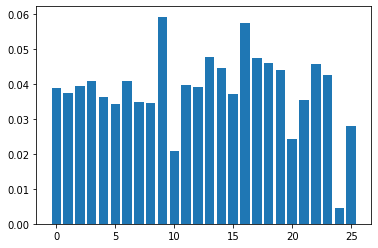

In [11]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Define the fitness function (fit) returning the fitness of
each search agents

In [12]:
def fitness_function(pos):
    lf=len([i for i in pos if i > 0.5]) 
    imp=0
    for i in [index for index,value in enumerate(pos) if value > 0.5]:
        imp+=importance[i]
    
    lt=dim
    wf=0.7
    fnt=imp +(wf*(1-(lf/lt)))
    return fnt
    

In [13]:
Max_iter=1000
for l in range(0, Max_iter):
    for i in range(0, SearchAgents_no):

        # Return back the search agents that go beyond the boundaries of the search space
        for j in range(dim):
            Positions[i, j] = np.clip(Positions[i, j], lb[j], ub[j])
        
        # Calculate objective function for each search agent
        fitness = fitness_function(Positions[i, :])
        
        
        if fitness > alpha_score :
            alpha_score = fitness
            alpha_pos = np.array(Positions[i,:])
        if (fitness < alpha_score and fitness > beta_score):
            beta_score = fitness
            beta_pos = np.array(Positions[i,:])
        if (fitness < alpha_score and fitness < beta_score and fitness > delta_score):
            delta_score = fitness
            delta_pos = np.array(Positions[i,:])
   
    a = 2 - l * ((2) / Max_iter) # a decreases linearly fron 2 to 0
    
    # Update the Position of search agents including omegas
    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            r1 = random.random()  # r1 is a random number in [0,1]
            r2 = random.random()  # r2 is a random number in [0,1]

            A1 = 2 * a * r1 - a
            C1 = 2 * r2
               
            D_alpha = abs(C1 * alpha_pos[j] - Positions[i, j])
            X1 = alpha_pos[j] - A1 * D_alpha    

            r1 = random.random()
            r2 = random.random()

            A2 = 2 * a * r1 - a
            C2 = 2 * r2
    
            D_beta = abs(C2 * beta_pos[j] - Positions[i, j])
            X2 = beta_pos[j] - A2 * D_beta         

            r1 = random.random()
            r2 = random.random()

            A3 = 2 * a * r1 - a
            C3 = 2 * r2
             
            D_delta = abs(C3 * delta_pos[j] - Positions[i, j])
            X3 = delta_pos[j] - A3 * D_delta
              
            x=(X1 + X2 + X3)/3
            
            sig_x = 1/(1 + math.exp(10 *(x-0.5)))
    
            Positions[i, j]=sig_x



Use the Alpha_pos for feature selection

In [14]:
def dimReduction(X_train,X_test,alpha_pos):
    X_train=np.delete(X_train,[index for index,value in enumerate(alpha_pos) if value < 0.5], axis = 1) 
    X_test=np.delete(X_test,[index for index,value in enumerate(alpha_pos) if value < 0.5], axis = 1)
    return X_train,X_test
X_train,X_test=dimReduction(X_train,X_test,alpha_pos)


A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

In [15]:
estimator = [] 
estimator.append(('RFC', RandomForestClassifier())) 
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('DTC', DecisionTreeClassifier()))

# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
      

In [16]:
def prediction(X_test):
    return vot_hard.predict(X_test) 
    
y_pred=prediction(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [17]:
# using accuracy_score metric to predict accuracy 
print(accuracy_score(y_test, y_pred))

0.48214285714285715


In binary classification, the count of true negatives is C(0,0), false negatives is C(1,0),true positives is C(1,1) and false positives C(0,1)is.

In [18]:
print(confusion_matrix(y_test,y_pred))


[[ 0  0]
 [87 81]]


Precision = TruePositives / (TruePositives + FalsePositives)



Recall = TruePositives / (TruePositives + FalseNegatives)


F1-score = 2 x Recall x Precision / Recall+Precision

In [19]:
print(classification_report(y_test,y_pred,target_names=["No Parkinson","Yes Parkinson"]))

               precision    recall  f1-score   support

 No Parkinson       0.00      0.00      0.00         0
Yes Parkinson       1.00      0.48      0.65       168

     accuracy                           0.48       168
    macro avg       0.50      0.24      0.33       168
 weighted avg       1.00      0.48      0.65       168

